In [1]:
import cv2
img=cv2.imread('/content/drive/MyDrive/grid/train/good/000.png')
img.shape

(1024, 1024, 3)

In [58]:
#train,valの振り分け
import numpy as np
import os
import cv2
x_train=[]
x_test=[]
y_train=[]
y_test=[]
for cnt,img in enumerate(os.listdir('/content/drive/MyDrive/grid/train/good')):
  image=cv2.imread(os.path.join('/content/drive/MyDrive/grid/train/good',img))
  image=cv2.resize(image,(260,260))
  if cnt<250:
    x_train.append(image)
    y_train.append(1)
  else:
    x_test.append(image)
    y_test.append(1)
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [7]:
x_train.shape

(250, 260, 260, 3)

In [59]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',input_shape=(260,260,3)),
  tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D((2, 2),padding='same'),
# Decoder
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.UpSampling2D((2, 2)),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
  tf.keras.layers.UpSampling2D((2, 2)),
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
  tf.keras.layers.UpSampling2D((2, 2)),
  tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])
model.compile(optimizer='adam', loss='mse')
model.summary()
model.fit(x_train, x_train,
          epochs=1000,
          batch_size=128,
          shuffle=True,
          validation_data=(x_test, x_test),
          )

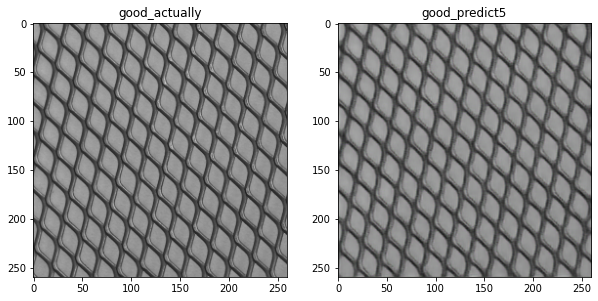

In [302]:
'''
AutoEncoderを使うことで､異常検知やラベル付けに関しても値が外れすぎている場合に対してラベルを振ることが可能
'''

#正常データの場合
img=cv2.imread('/content/drive/MyDrive/grid/train/good/260.png')
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
x=1
y=2
img=cv2.resize(img,(260,260))
ax1=fig.add_subplot(x,y,1)
ax1.set_title('good_actually')
plt.imshow(img)
img=np.reshape(img,(1,260,260,3))
img=img/255.0
predict_img=model.predict(img)
predict_img=np.reshape(predict_img,(260,260,3))
predict_img=np.array(predict_img*255,dtype='uint8')
ax2=fig.add_subplot(x,y,2)
ax2.set_title('good_predict'+str(cnt+1))
plt.imshow(predict_img)
plt.show()
fig.savefig("/content/img.png")

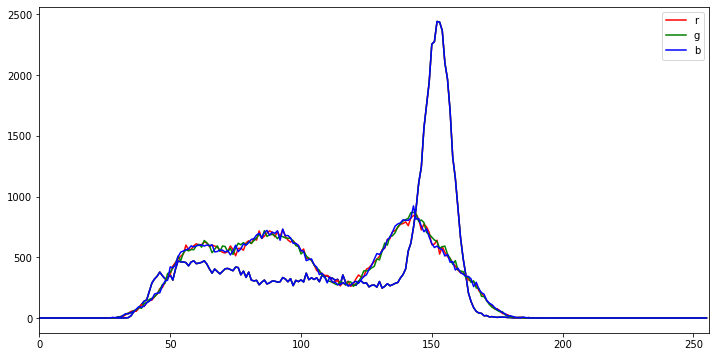

In [311]:
fig=plt.figure(figsize=(12,6))
img=cv2.imread('/content/drive/MyDrive/grid/train/good/260.png')
img=cv2.resize(img,(260,260))
colors = ("r", "g", "b")
for i, channel in enumerate(colors):
    histgram = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histgram, color = channel)
    plt.xlim([0, 256])

for i, channel in enumerate(colors):
    histgram = cv2.calcHist([predict_img], [i], None, [256], [0, 256])
    plt.plot(histgram, color = channel,label=str(channel))
    plt.xlim([0, 256])
fig.savefig("/content/img1.png")
plt.legend()
plt.show()

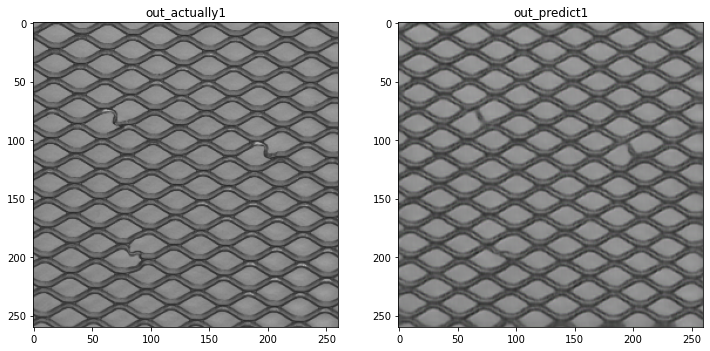

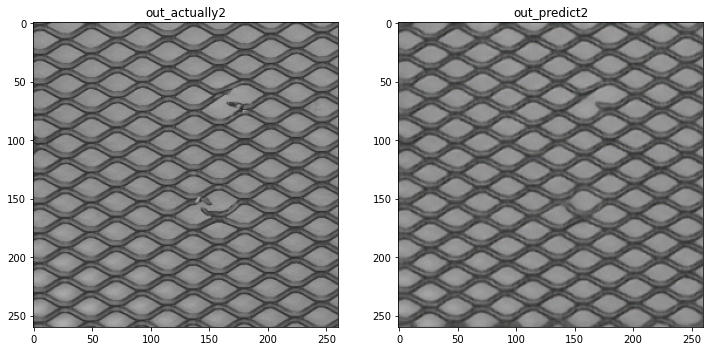

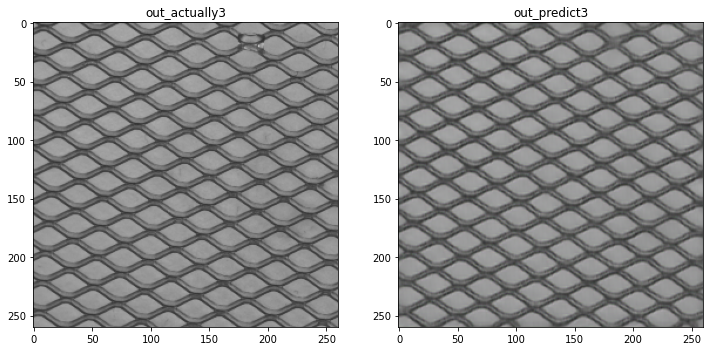

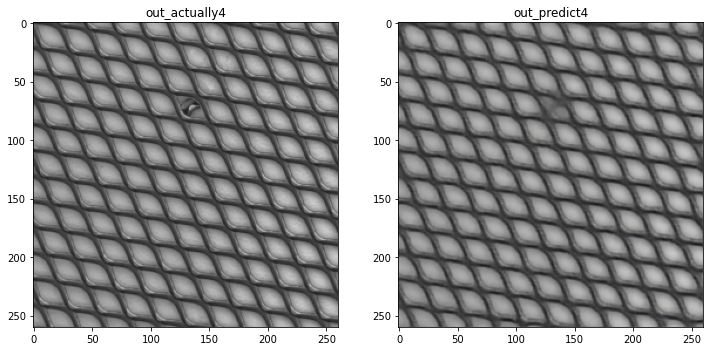

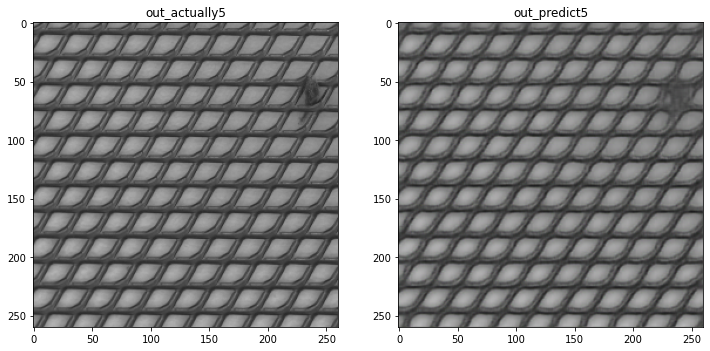

In [305]:
import matplotlib.pyplot as plt
out_path=['/content/drive/MyDrive/grid/test/bent/000.png','/content/drive/MyDrive/grid/test/broken/000.png','/content/drive/MyDrive/grid/test/glue/000.png','/content/drive/MyDrive/grid/test/metal_contamination/000.png','/content/drive/MyDrive/grid/test/thread/000.png']
#欠陥データの場合
for cnt,i in enumerate(out_path):
  fig=plt.figure(figsize=(12,20))
  x=1
  y=2
  img=cv2.imread(i)
  img=cv2.resize(img,(260,260))
  ax1=fig.add_subplot(x,y,1)
  ax1.set_title('out_actually'+str(cnt+1))
  plt.imshow(img)
  img=np.reshape(img,(1,260,260,3))
  img=img/255.0
  predict_img=model.predict(img)
  predict_img=np.reshape(predict_img,(260,260,3))
  predict_img=np.array(predict_img*255,dtype='uint8')
  ax2=fig.add_subplot(x,y,2)
  ax2.set_title('out_predict'+str(cnt+1))
  plt.imshow(predict_img)
  fig.savefig('/content/'+str(cnt)+'.png')
plt.show()

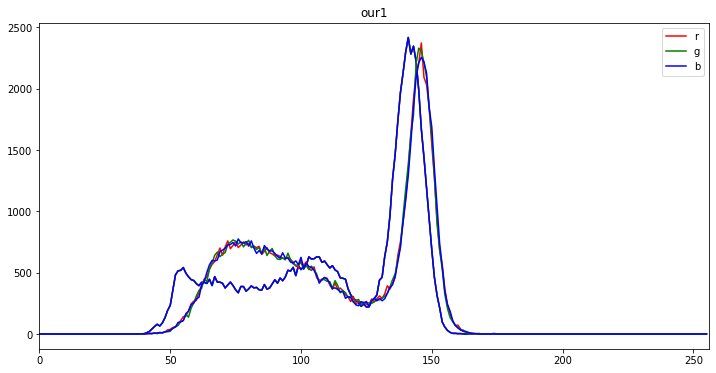

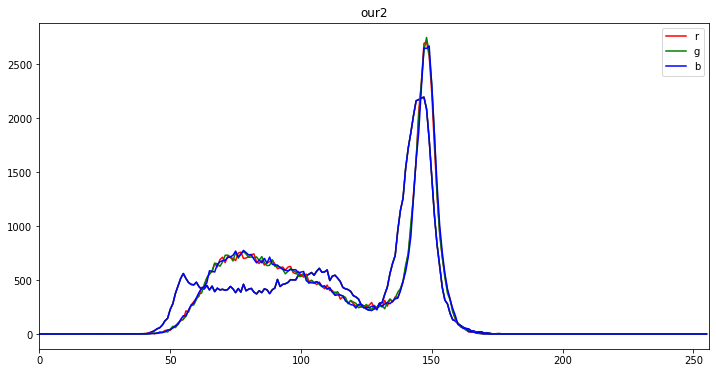

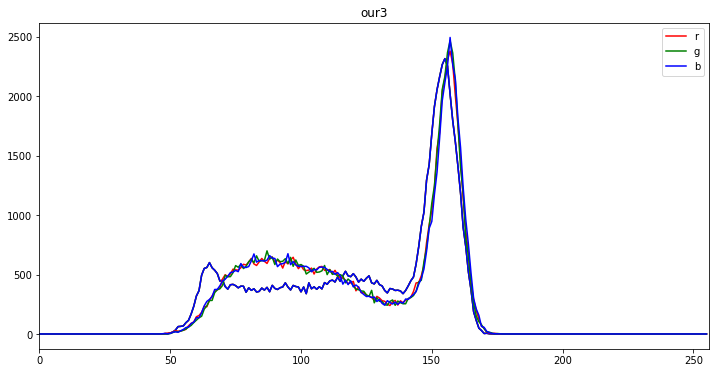

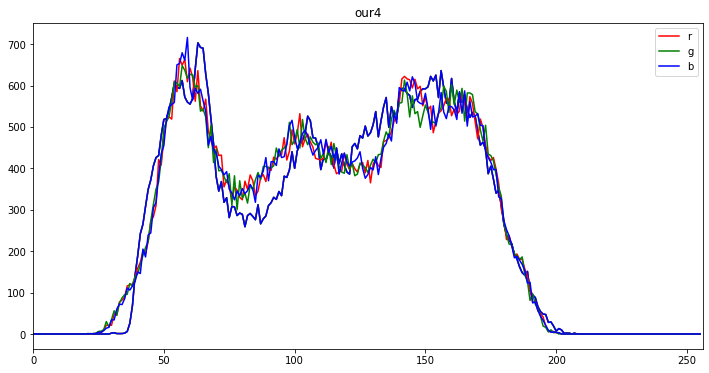

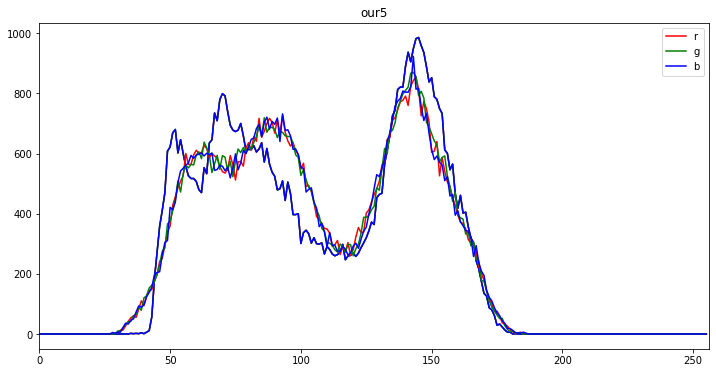

In [309]:
out_path=['/content/drive/MyDrive/grid/test/bent/000.png','/content/drive/MyDrive/grid/test/broken/000.png','/content/drive/MyDrive/grid/test/glue/000.png','/content/drive/MyDrive/grid/test/metal_contamination/000.png','/content/drive/MyDrive/grid/test/thread/000.png']
#欠陥データの場合

for cnt,i in enumerate(out_path):
  fig=plt.figure(figsize=(12,6))
  img=cv2.imread(i)
  img=cv2.resize(img,(260,260))
  data=img
  plt.title('our'+str(cnt+1))
  colors = ("r", "g", "b")
  for i, channel in enumerate(colors):
      histgram = cv2.calcHist([img], [i], None, [256], [0, 256])
      plt.plot(histgram, color = channel)
      plt.xlim([0, 256])
  img=cv2.resize(img,(260,260))
  img=np.reshape(img,(1,260,260,3))
  img=img/255.0
  predict_img=model.predict(img)
  import matplotlib.pyplot as plt
  predict_img=np.reshape(predict_img,(260,260,3))
  predict_img=np.array(predict_img*255,dtype='uint8')
  for i, channel in enumerate(colors):
      histgram = cv2.calcHist([predict_img], [i], None, [256], [0, 256])
      plt.plot(histgram, color = channel,label=str(channel))
      plt.xlim([0, 256])
  plt.legend()
  plt.show()
  fig.savefig('/content/'+str(cnt)+'g.png')